In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image 
import pydotplus

Populating the interactive namespace from numpy and matplotlib


# 1. Data Set Description

df is a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. Our project is focusing on using machine learning to predict attrition. We are also providing interesting findings that people usually don't think of regarding employee attrition.

Important columns in <b> df </b> are:
<ol>
<li>Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else.</li>
<li>Age: 18 to 60 years old</li>
<li>Gender: Female or Male</li>
<li>Department: Research & Development, Sales, Human Resources.</li>
<li>BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel.</li>
<li>DistanceFromHome: Distance between the company and their home in miles.</li>
<li>MonthlyIncome: Employees' numeric monthly income.</li>
<li>MaritalStatus: Married, Single, Divorced.</li>
<li>Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'.</li>
<li>EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other. </li>
<li>EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.</li>
<li>RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.</li>
<li>JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.</li>
<li>JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc</li>
<li>JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.</li>
<li>OverTime: Whether they work overtime or not. </li>
<li>NumCompaniesWorked: Number of companies they worked for before joinging IBM.</li>
<li>PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'.</li>
<li>YearsAtCompany: Years they worked for IBM. </li>
<li>WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.</li>
<li>YearsSinceLastPromotion: Years passed since their last promotion.</li>
</ol>

In [140]:
df = pd.read_csv('Attrition.csv')
pd.options.display.max_columns = None

In [141]:
df.shape

(1470, 35)

In [142]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 2. Data Preparation

### Check missing values

In [143]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

From the above we can tell there is no missing value in the dataset.

### Check duplicate rows

In [144]:
df[df.duplicated(keep='first')].shape

(0, 35)

From the above we can tell there is no duplicate rows.

### Check column types

In [145]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

All data types are correct.

### Check Column Values

Eliminate columns that only have one data level

In [146]:
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)

In [147]:
df.shape

(1470, 32)

In [148]:
temp

['EmployeeCount', 'Over18', 'StandardHours']

'EmployeeCount', 'Over18' and 'StandardHours' columns are deleted

It is also noticed that employee number doesn't have much meaning for the analysis so we are dropping this column as well.

In [149]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

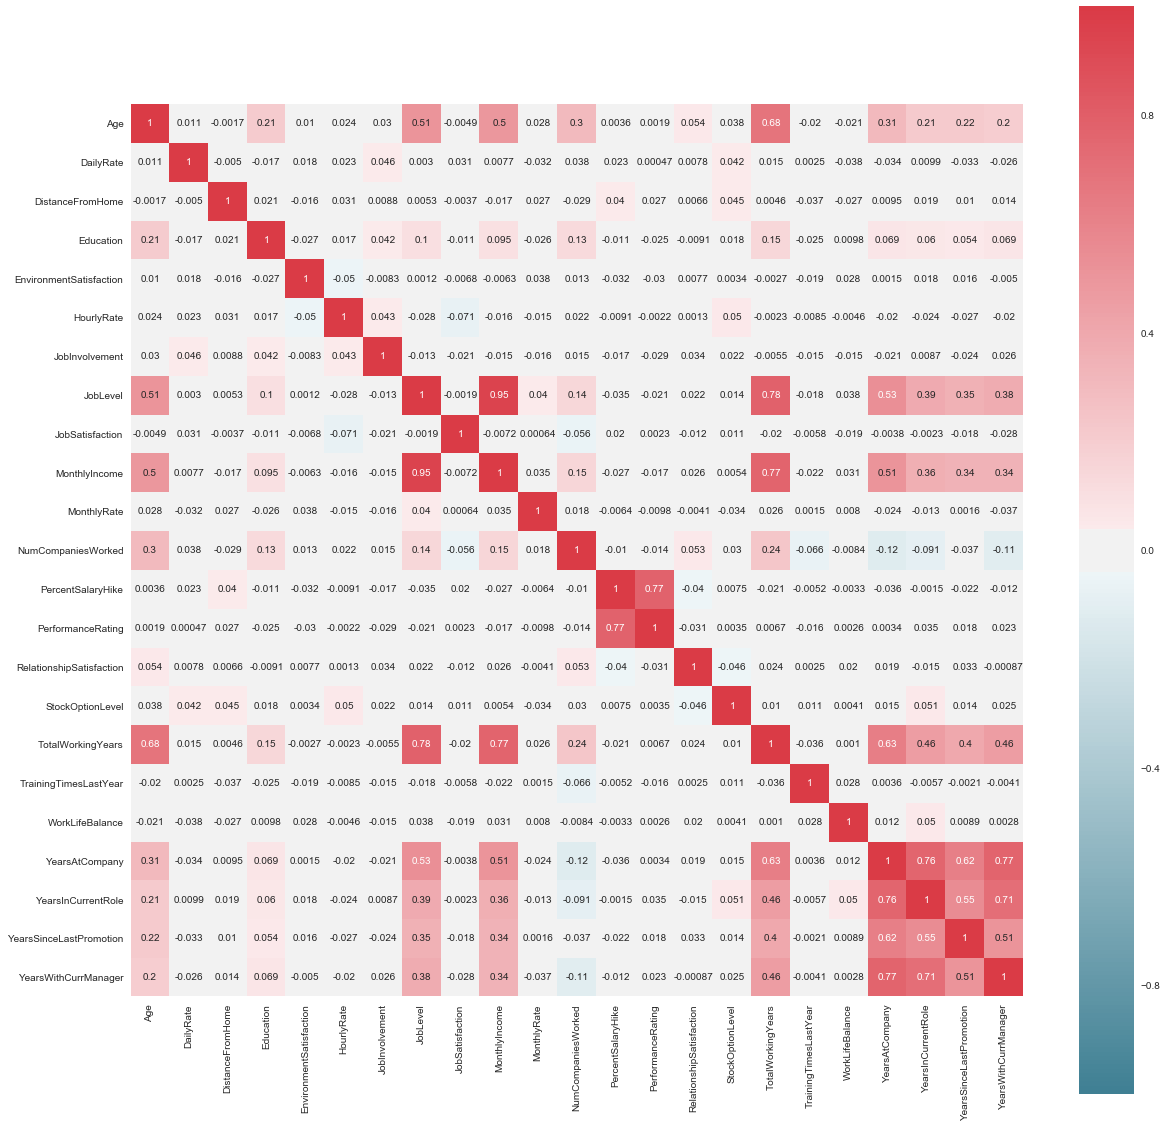

In [150]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

From the correlation table we see that monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.

In [151]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

Some other conclusions we get from the correlation table:
1. Job level and total working years are highly correlated.
2. Monthly Income and total working years are highly correlated.
3. Performance rating and percentage salary hike are highly correlated.
4. Years in current role and years at company are highly correlated.
5. Years with current manager and years at company are highly correlated.

### Binarize Gender, OverTime and Attrition

In [152]:
df['Male'] = df.Gender == 'Male'

In [153]:
df.drop('Gender', axis = 1,inplace=True)

In [154]:
df['OverTime'] = df.OverTime == 'Yes'

In [155]:
df['Attrition'] = df.Attrition == 'Yes'

# 3. Exploratory Data Visualization

This section is providing a general idea about attrition in the data set by looking at gender, marital status and department.

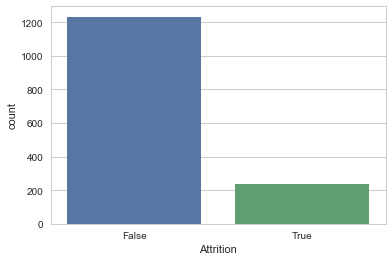

In [156]:
sns.countplot(x='Attrition', data=df)

This figure is showing the distribution of employee attrition. In this dataset, 237 employees left the company while 1233 stay. The data is very imbalanced, which could potentially lead to problems in machine learning.

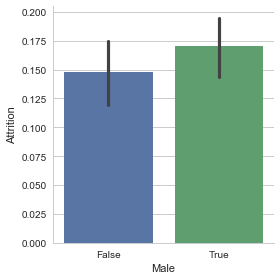

In [157]:
sns.factorplot(x = 'Male', y='Attrition', kind = 'bar', data=df)

Male is generally more likely to quit than female.

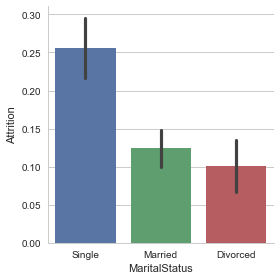

In [158]:
sns.factorplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df)

Single peopel are more likely to quit compared to married and divorced people.

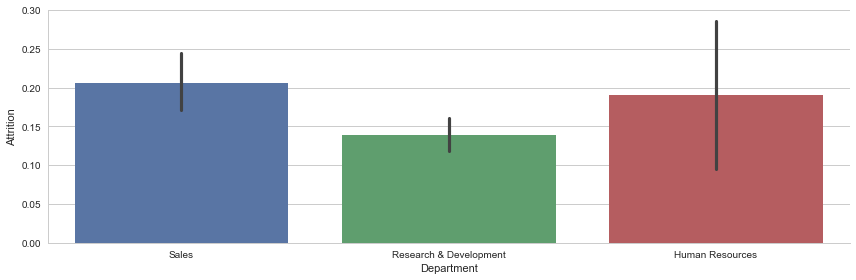

In [159]:
sns.factorplot(x = 'Department', y='Attrition', kind = 'bar', data=df, aspect = 3)

Sales department and Human resources department are having higher attrition rate compared to research and development department.

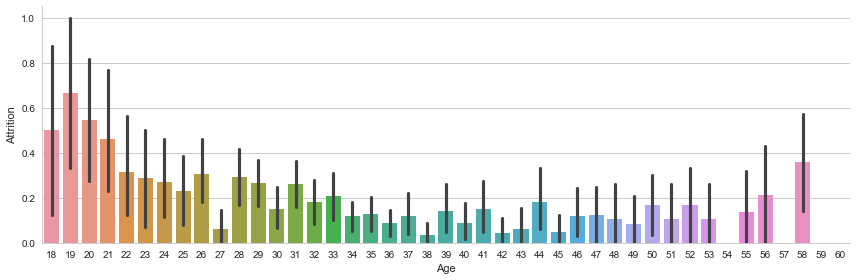

In [160]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)

Younger peopel are having higher attrition rate compared to older people.

# 4: Machine Learning

## Classification for Prediction

Make dummy variables for BusinessTravel, Department, EducationField, JobRole, MaritalStatus

In [161]:
df1 = pd.get_dummies(df, columns=['BusinessTravel','Department',
                        'EducationField','JobRole','MaritalStatus'])

In [162]:
df1.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,True,1,2,2,3,2,4,5993,8,True,11,3,1,0,8,0,1,6,4,0,5,False,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,False,8,1,3,2,2,2,5130,1,False,23,4,4,1,10,3,3,10,7,1,7,True,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,True,2,2,4,2,1,3,2090,6,True,15,3,2,0,7,3,3,0,0,0,0,True,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,False,3,4,4,3,1,3,2909,1,True,11,3,3,0,8,3,3,8,7,3,0,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,False,2,1,1,3,1,2,3468,9,False,12,3,4,1,6,3,3,2,2,2,2,True,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [163]:
X = df1.drop('Attrition',axis=1)

In [164]:
Y = df1.Attrition

In [165]:
# train a decision tree to predict attrition
dt = tree.DecisionTreeClassifier(max_depth=2)

In [166]:
# build the tree
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Visualize a decision tree dt, trained with the attributes in X and the class labels in Y

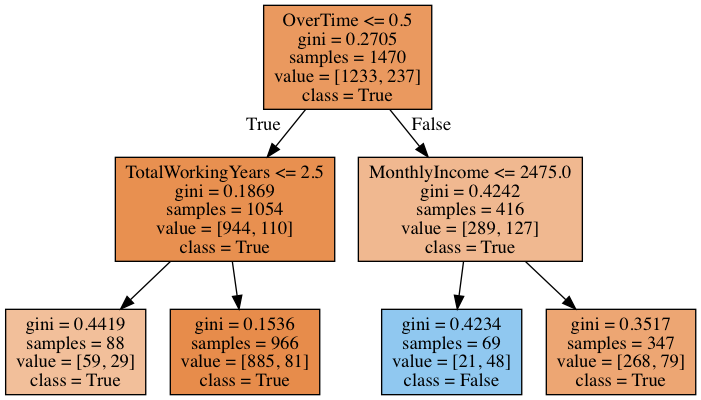

In [167]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Decision tree is not reflecting correct result.

Recall that we have some variables that are highly correlated with each other. Our second attempt will get rid of those variables and see if it improves the tree.

In [168]:
df2 = df1.drop(['TotalWorkingYears','YearsAtCompany','PerformanceRating'],axis=1)

In [169]:
X = df2.drop('Attrition',axis=1)
Y = df2.Attrition

In [170]:
# train a decision tree to predict attrition
dt = tree.DecisionTreeClassifier(max_depth=2)

In [171]:
# build the tree
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

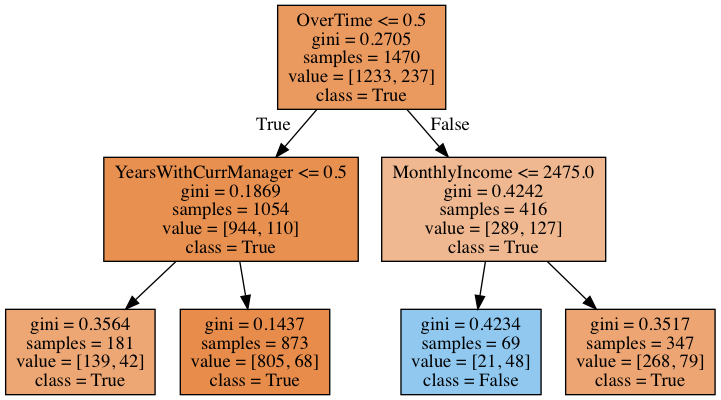

In [172]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

The tree still doesn't make much sense.

Select the best classifier

In [173]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [174]:
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') 0.612728345685
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 0.757659724963
GaussianNB(priors=None) 0.770308664714
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
        

/Users/jtl/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/jtl/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/jtl/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/jtl/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/jtl/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/jtl/Library/E

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001) 0.750894693459
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) 0.677845292681
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.504559006041
***********************************************
Best is... AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) 0.

From the above result we see that Decision tree is not performing well for the data and logistics regression is actually doing pretty well.

### Feature Selection and Logistics Regression

In [175]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [176]:
df3 = df.copy()

### Create dummies and interaction terms

In [177]:
df3.loc[df3['BusinessTravel'] == 'Non-Travel', 'b_travel'] = 0
df3.loc[df3['BusinessTravel'] == 'Travel_Rarely', 'b_travel'] = .5
df3.loc[df3['BusinessTravel'] == 'Travel_Frequently', 'b_travel'] = 1

In [178]:
df3 = pd.get_dummies(df3, columns=['MaritalStatus','EducationField', 'Department'])

In [179]:
df3.loc[(df3['Age'] <40)|(df3['Age'] >50), 'age40_50'] = 0
df3.loc[(df3['Age']>=40) &(df3['Age']<=50), 'age40_50'] = 1
df3.loc[df3['Male'] == 0, 'female'] = 1
df3.loc[df3['Male'] == 1, 'female'] = 0
df3.loc[df3['Education'] == 5, 'doc'] = 1
df3.loc[df3['Education'] != 5, 'doc'] = 0
df3.loc[df3['JobLevel'] == 3, 'joblevel3'] = 1
df3.loc[df3['JobLevel'] != 3, 'joblevel3'] = 0

In [180]:
df3['joblevel_hr'] = df3['Department_Human Resources'] * df3.JobLevel
df3['joblevel_rd'] = df3['Department_Research & Development'] * df3.JobLevel
df3['age40_50_female_div'] = df3.female * df3.age40_50 * df3.MaritalStatus_Divorced
df3['doc_job3'] = df3.doc * df3.joblevel3
df3 = df3.drop(['female','doc','age40_50','joblevel3'],axis=1)
df3.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male,b_travel,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,joblevel_hr,joblevel_rd,age40_50_female_div,doc_job3
0,41,True,Travel_Rarely,1,2,2,3,2,Sales Executive,4,5993,8,True,11,3,1,0,8,0,1,6,4,0,5,False,0.5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0
1,49,False,Travel_Frequently,8,1,3,2,2,Research Scientist,2,5130,1,False,23,4,4,1,10,3,3,10,7,1,7,True,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,2,0.0,0.0
2,37,True,Travel_Rarely,2,2,4,2,1,Laboratory Technician,3,2090,6,True,15,3,2,0,7,3,3,0,0,0,0,True,0.5,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0.0,0.0
3,33,False,Travel_Frequently,3,4,4,3,1,Research Scientist,3,2909,1,True,11,3,3,0,8,3,3,8,7,3,0,False,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0.0,0.0
4,27,False,Travel_Rarely,2,1,1,3,1,Laboratory Technician,2,3468,9,False,12,3,4,1,6,3,3,2,2,2,2,True,0.5,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0.0,0.0


In [181]:
df3.dtypes

Age                                    int64
Attrition                               bool
BusinessTravel                        object
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
JobInvolvement                         int64
JobLevel                               int64
JobRole                               object
JobSatisfaction                        int64
MonthlyIncome                          int64
NumCompaniesWorked                     int64
OverTime                                bool
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSince

In [182]:
df3=df3.drop(['BusinessTravel','JobRole'],axis=1)

In [183]:
df3['Attrition'] = df3['Attrition'].astype('int')
df3['Male'] = df3['Male'].astype('int')
df3['OverTime'] = df3['OverTime'].astype('int')

In [184]:
df3.dtypes

Age                                    int64
Attrition                              int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
NumCompaniesWorked                     int64
OverTime                               int64
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
Male      

### Feature Selections

In [185]:
data_final_vars=df3.columns.values.tolist()
Y=['Attrition']
X=[i for i in data_final_vars if i not in Y]
X

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Male',
 'b_travel',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'joblevel_hr',
 'joblevel_rd',
 'age40_50_female_div',
 'doc_job3']

### RandomForest Feature Importance

/Users/jtl/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


                                   importance
feature                                      
Age                                     0.083
MonthlyIncome                           0.076
OverTime                                0.059
TotalWorkingYears                       0.055
YearsAtCompany                          0.055
DistanceFromHome                        0.052
PercentSalaryHike                       0.046
NumCompaniesWorked                      0.042
TrainingTimesLastYear                   0.039
JobSatisfaction                         0.037
StockOptionLevel                        0.036
YearsWithCurrManager                    0.033
EnvironmentSatisfaction                 0.033
RelationshipSatisfaction                0.033
YearsSinceLastPromotion                 0.032
YearsInCurrentRole                      0.030
JobInvolvement                          0.028
WorkLifeBalance                         0.028
joblevel_rd                             0.026
b_travel                          

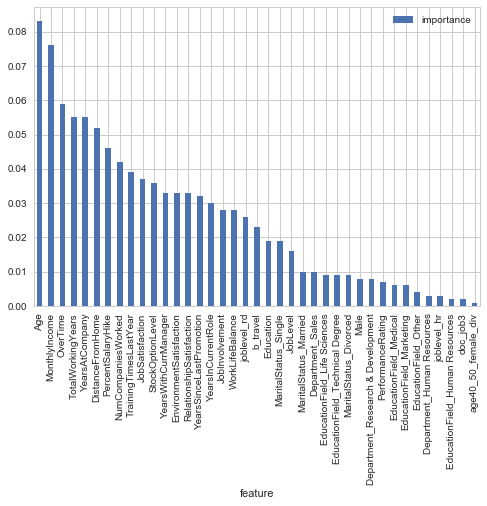

In [186]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(df3[X], df3[Y])
importances = pd.DataFrame({'feature':X,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print importances
importances.plot.bar()

### Recursive Feature Elimination(used in Logistic Regression)

In [187]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(df3[X], df3[Y] )
print(rfe.support_)
featureRFE_ranking = pd.DataFrame({'Features':X, 'rfe_ranking':rfe.ranking_}).sort_values(by = 'rfe_ranking')
print(featureRFE_ranking)

[False False False  True  True  True  True False  True  True False  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True]
                             Features  rfe_ranking
19            YearsSinceLastPromotion            1
20               YearsWithCurrManager            1
21                               Male            1
22                           b_travel            1
24              MaritalStatus_Married            1
25               MaritalStatus_Single            1
26     EducationField_Human Resources            1
37                age40_50_female_div            1
28           EducationField_Marketing            1
31    EducationField_Technical Degree            1
32         Department_Human Resources            1
33  Department_Research & Development            1
34                   Department_Sales            1
35                        joblevel_hr          

In [188]:
X_columns = np.array(X)[np.array(rfe.support_)]
X_columns

array(['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Male', 'b_travel', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EducationField_Human Resources',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'joblevel_hr', 'joblevel_rd', 'age40_50_female_div', 'doc_job3'], 
      dtype='|S33')

In [189]:
X = df3[X_columns]
Y = df3[Y]

In [190]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309601
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1440
Method:                           MLE   Df Model:                           29
Date:                Tue, 20 Mar 2018   Pseudo R-squ.:                  0.2991
Time:                        20:48:14   Log-Likelihood:                -455.11
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 1.691e-64
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
EnvironmentSatisfaction              -0.3919      0.079     -4

### Test for Model Fitting

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.89


### Cross Validation (10-fold)

In [193]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.872


The model doesn't have evidence of significant overfiting since the average accuracy .872 is very close to .89.

### Confusion Matrix

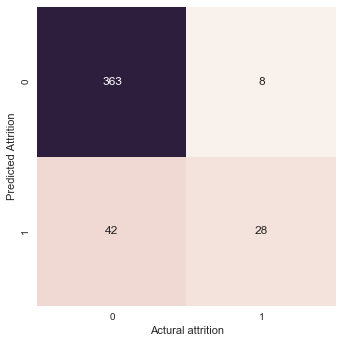

In [194]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

363 + 28 correct predictions and 42+8
incorrect predictions.

In [195]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       371
          1       0.78      0.40      0.53        70

avg / total       0.88      0.89      0.87       441



*The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

*The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

*The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

*The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

*The support is the number of occurrences of each class in y_test.

## Clustering

In [196]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

KMean with k=2 is the best model

In [197]:
bestSil = -1
for k in range(2,4):
    clus =[KMeans(n_clusters=k, n_jobs=-1), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    for clu in clus:
        res = clu.fit(df1)
        sil = metrics.silhouette_score(df1, res.labels_)
        print (str(clu)[:10])+' with k = '+str(k)+":"+str(round(sil,4))
        if (sil > bestSil):
            bestSil = sil
            bestCl = clu

KMeans(alg with k = 2:0.7079
Birch(bran with k = 2:0.6713
Agglomerat with k = 2:0.6713
KMeans(alg with k = 3:0.6234
Birch(bran with k = 3:0.6665
Agglomerat with k = 3:0.6665


In [198]:
df1['cluster_k2'] = bestCl.labels_
df1.groupby('cluster_k2').mean().transpose()

cluster_k2,0,1
Age,44.215152,34.813158
Attrition,0.100000,0.178947
DistanceFromHome,9.072727,9.227193
Education,3.039394,2.876316
EnvironmentSatisfaction,2.693939,2.729825
JobInvolvement,2.690909,2.741228
JobLevel,3.684848,1.594737
JobSatisfaction,2.709091,2.734211
MonthlyIncome,14060.493939,4315.215789
NumCompaniesWorked,3.342424,2.505263


According to the clustering results, cluster 0 has lower attrition rate, older age, fewer single people, much higher income,  larger NumCompaniesWorked, much more YearsAtCompany, much more YearsSinceLastPromotion and more senior positions.

# 5. Interesting Findings

## Finding 1: Human Resource Department is having a high attrition rate even though their compensation and promotion are relative good compared to other non-managerial roles.

Create a new data frame that contains each job role's monthly income and attrition rate, ordered by monthly income ascending.

In [199]:
role_income = df.groupby('JobRole', as_index=False)[['MonthlyIncome', 'Attrition']].mean().sort_values(
    by=['MonthlyIncome'])
role_income

,JobRole,MonthlyIncome,Attrition
8,Sales Representative,2626.000000,0.397590
2,Laboratory Technician,3237.169884,0.239382
6,Research Scientist,3239.972603,0.160959
1,Human Resources,4235.750000,0.230769
7,Sales Executive,6924.279141,0.174847
4,Manufacturing Director,7295.137931,0.068966
0,Healthcare Representative,7528.763359,0.068702
5,Research Director,16033.550000,0.025000
3,Manager,17181.676471,0.049020


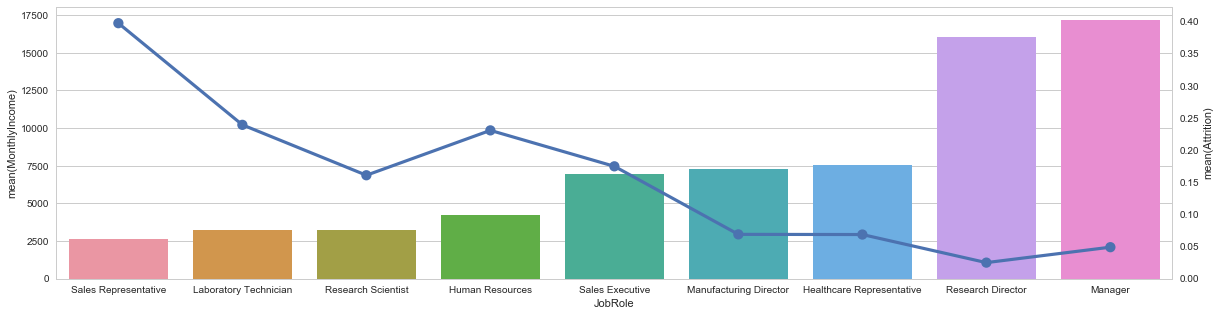

In [200]:
fig, ax = plt.subplots(figsize=(20,5))
sns.factorplot(x='JobRole', y='MonthlyIncome', data=role_income, aspect=4, size=4, kind='bar', ax=ax)
ax2 = ax.twinx()
sns.factorplot(x='JobRole', y='Attrition', data=role_income, aspect=4, size=4, ax=ax2)
ax2.grid(None)
plt.close(2)
plt.close(3)

The plot is showing an overall trend that as monthly income increases, the attrition rate goes down. However, we see the exception for human resources. Compared to other non-managerial roles, human resource role is having higher monthly income but it's attrition rate is surprisingly higher than other roles. To investigate potential reasons, we look at years since last promotion and job satisfaction.

In [201]:
df.groupby('JobRole', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,JobRole,YearsSinceLastPromotion
8,Sales Representative,1.060241
1,Human Resources,1.269231
2,Laboratory Technician,1.420849
6,Research Scientist,1.506849
4,Manufacturing Director,2.117241
7,Sales Executive,2.484663
0,Healthcare Representative,2.969466
5,Research Director,3.187500
3,Manager,4.833333


Compared to other roles, human resouces generally get promoted fast.

In [202]:
df.groupby('JobRole', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,JobRole,JobSatisfaction
1,Human Resources,2.557692
4,Manufacturing Director,2.682759
2,Laboratory Technician,2.691120
5,Research Director,2.700000
3,Manager,2.705882
8,Sales Representative,2.734940
7,Sales Executive,2.754601
6,Research Scientist,2.773973
0,Healthcare Representative,2.786260


Human resouces people are having a slightly lower job satisfaction compared to other roles.

## Finding 2: In terms of number of companies worked, people who worked in 2 - 4 companies are less likely to leave. Genderwise, female attrition rate is way less than male after working for 6 companies.

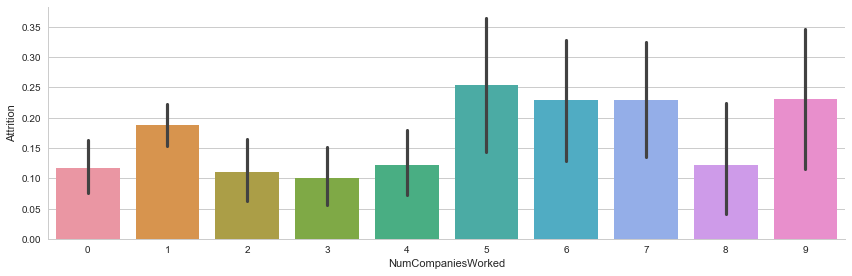

In [203]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'Attrition', data=df, aspect= 3, kind = 'bar')

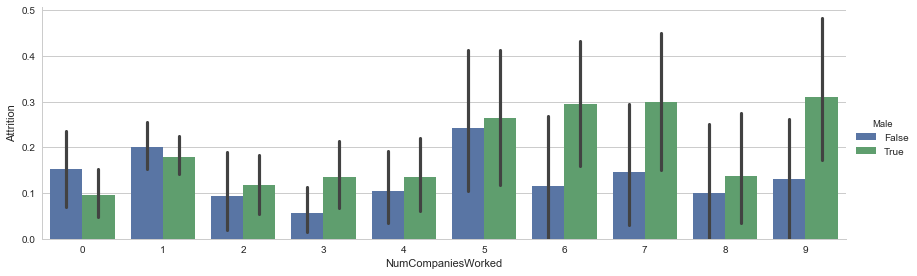

In [204]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'Attrition', hue = 'Male', data=df, aspect= 3, kind = 'bar')

## Finding 3: Doctors are having the highest attrition rate at Job Level 3, compared to other job levels where doctors are almost always having the lowest attrition rate.

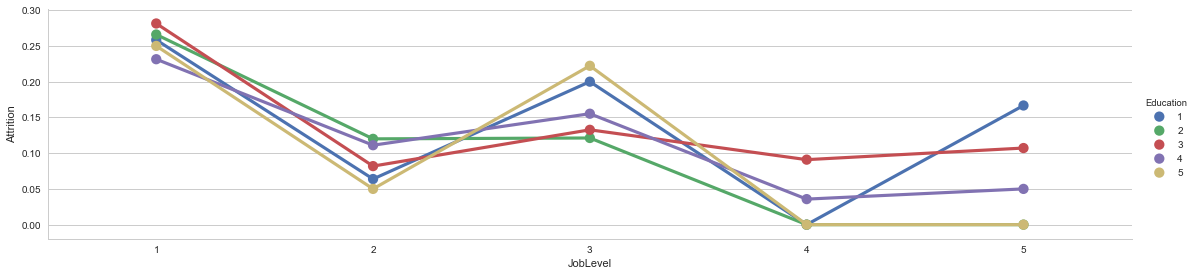

In [205]:
sns.factorplot(x = 'JobLevel', y = 'Attrition', hue = 'Education', data=df, aspect= 4, ci=None)

In [206]:
df[df.JobLevel ==3].groupby('Education', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,Education,JobSatisfaction
4,5,2.333333
3,4,2.655172
2,3,2.663265
1,2,2.787879
0,1,2.800000


One thing we noticed about doctors at job level 3 is that their overall job satisfaction is lower than other education level.

In [207]:
df[df.JobLevel ==4].groupby('Education', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,Education,YearsSinceLastPromotion
3,4,3.821429
1,2,4.823529
2,3,4.863636
4,5,5.555556
0,1,7.500000


It is also noticed that doctors are long taking really time to get to level 4 among people who receive higher education, which could potentially lead to their attrition.

# 6. Managerial Insights

<ol><li> The company should look deeper into human resource roles to understanding which part people are not satisfied with the job. Frequent communication and one-on-ones are strongly recommended. </li>
<li> While the company doesn’t need to worry too much about people who worked for 2 – 4 companies, it’s still worth paying attention to males who went to more than 5 companies. </li>
<li> Doctors are not very satisfied with their jobs at level 3 and are having a longer time to be promoted from job level 3 to job level 4. It is recommended to go over the performance review system carefully to make sure that people are rewarded properly. </li>
</ol>